In [22]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [23]:
A = sacc.Sacc.load_fits('../../TXPipe/data/example/outputs/summary_statistics_fourier.sacc')
B = sacc.Sacc.load_fits('../../TXPipe/data/example/outputs/twopoint_data_fourier.sacc')
C = sacc.Sacc.load_fits('../../TXPipe/data/example/outputs/summary_statistics_real.sacc')
D = sacc.Sacc.load_fits('../../TXPipe/data/example/outputs/twopoint_data_real.sacc')

/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


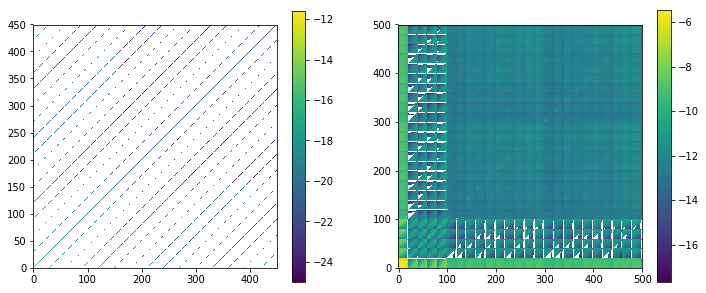

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(np.log10(A.covariance.covmat), origin='lower left')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.log10(C.covariance.covmat), origin='lower left')
plt.colorbar()

In [25]:
cov = A.covariance.covmat
def norm_cov(cov):
    cov_norm = cov.copy()
    for i in range(len(cov)):
        for j in range(len(cov)):
            cov_norm[i][j] /= np.sqrt(cov[i][i]*cov[j][j])
    return cov_norm

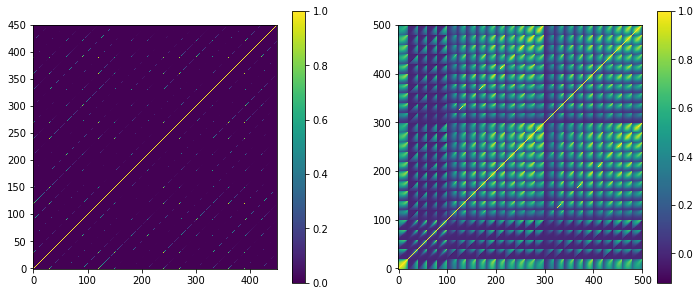

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(121)
cov = A.covariance.covmat
plt.imshow(norm_cov(cov), origin='lower left')
plt.colorbar()

cov = C.covariance.covmat
plt.subplot(122)
plt.imshow(norm_cov(cov), origin='lower left')
plt.colorbar()

In [27]:
print(A.get_data_types())
print(A.get_tracer_combinations())
print(C.get_data_types())
print(C.get_tracer_combinations())

['galaxy_density_cl', 'galaxy_shearDensity_cl_e', 'galaxy_shear_cl_ee']
[('lens_0', 'lens_0'), ('source_0', 'lens_0'), ('source_1', 'lens_0'), ('source_2', 'lens_0'), ('source_3', 'lens_0'), ('source_0', 'source_0'), ('source_1', 'source_0'), ('source_1', 'source_1'), ('source_2', 'source_0'), ('source_2', 'source_1'), ('source_2', 'source_2'), ('source_3', 'source_0'), ('source_3', 'source_1'), ('source_3', 'source_2'), ('source_3', 'source_3')]
['galaxy_density_xi', 'galaxy_shearDensity_xi_t', 'galaxy_shear_xi_minus', 'galaxy_shear_xi_plus']
[('lens_0', 'lens_0'), ('source_0', 'lens_0'), ('source_1', 'lens_0'), ('source_2', 'lens_0'), ('source_3', 'lens_0'), ('source_0', 'source_0'), ('source_1', 'source_0'), ('source_1', 'source_1'), ('source_2', 'source_0'), ('source_2', 'source_1'), ('source_2', 'source_2'), ('source_3', 'source_0'), ('source_3', 'source_1'), ('source_3', 'source_2'), ('source_3', 'source_3')]


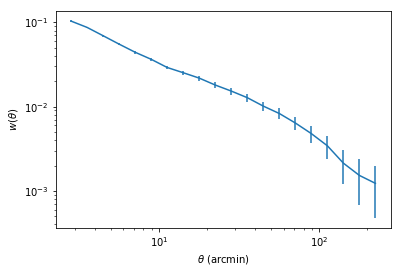

In [28]:
the,xi, cov = C.get_theta_xi('galaxy_density_xi', 'lens_0', 'lens_0', return_cov=True)
plt.figure()
plt.errorbar(the,xi, np.diag(cov)**0.5)
plt.xlabel('$\\theta$ (arcmin)')
plt.ylabel('$w(\\theta)$')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, '$\\gamma_{t}$')

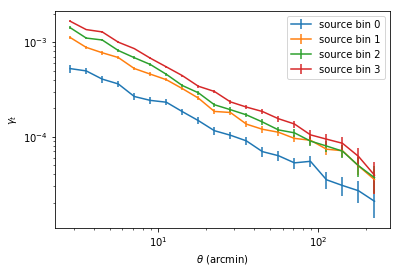

In [29]:
plt.figure()

for i in range(4):
    the,xi, cov = C.get_theta_xi('galaxy_shearDensity_xi_t', 'source_'+str(i), 'lens_0', return_cov=True)
    plt.errorbar(the,xi, np.diag(cov)**0.5, label='source bin '+str(i))
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$\\theta$ (arcmin)')
plt.ylabel('$\\gamma_{t}$')


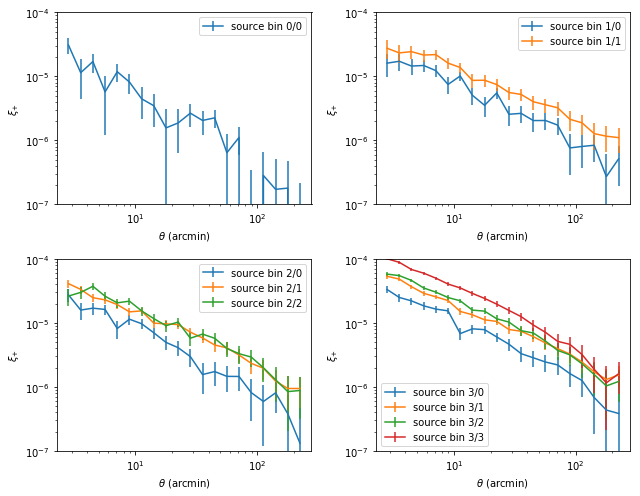

In [30]:

plt.figure(figsize=(9,7))

for i in range(4):
    for j in range(4):
        if i>=j:
            plt.subplot(2,2,i+1)

            the,xi, cov = C.get_theta_xi('galaxy_shear_xi_plus', 'source_'+str(i), 'source_'+str(j), return_cov=True)
            plt.errorbar(the,xi, np.diag(cov)**0.5, label='source bin '+str(i)+'/'+str(j))

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-7, 1e-4)
    plt.legend()
    plt.xlabel('$\\theta$ (arcmin)')
    plt.ylabel('$\\xi_{+}$')
    plt.tight_layout()

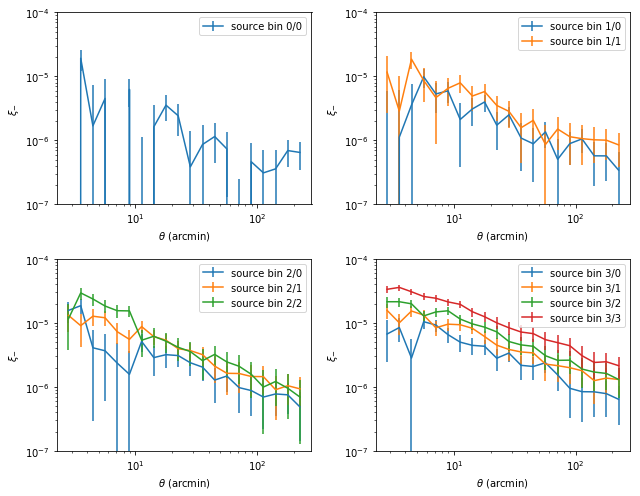

In [31]:
plt.figure(figsize=(9,7))

for i in range(4):
    for j in range(4):
        if i>=j:
            plt.subplot(2,2,i+1)

            the,xi, cov = C.get_theta_xi('galaxy_shear_xi_minus', 'source_'+str(i), 'source_'+str(j), return_cov=True)
            plt.errorbar(the,xi, np.diag(cov)**0.5, label='source bin '+str(i)+'/'+str(j))

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-7, 1e-4)
    plt.legend()
    plt.xlabel('$\\theta$ (arcmin)')
    plt.ylabel('$\\xi_{-}$')
    plt.tight_layout()

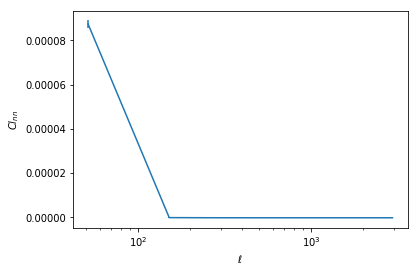

In [32]:
ell,cl, cov = A.get_ell_cl('galaxy_density_cl', 'lens_0', 'lens_0', return_cov=True)
plt.figure()
plt.errorbar(ell,cl, np.diag(cov)**0.5)
plt.xlabel('$\\ell$')
plt.ylabel('$Cl_{nn}$')
plt.xscale('log')
# plt.yscale('log')

In [33]:
print(cl)

[ 8.74109432e-05 -1.15689672e-07 -1.68533486e-07 -1.79723198e-07
 -1.83753790e-07 -1.85029254e-07 -1.85870887e-07 -1.86146848e-07
 -1.86427388e-07 -1.86520035e-07 -1.86625197e-07 -1.86685836e-07
 -1.86723120e-07 -1.86756973e-07 -1.86775611e-07 -1.86793453e-07
 -1.86804485e-07 -1.86814434e-07 -1.86818149e-07 -1.86824094e-07
 -1.86832048e-07 -1.86836502e-07 -1.86839825e-07 -1.86842695e-07
 -1.86843401e-07 -1.86844796e-07 -1.86849174e-07 -1.86850302e-07
 -1.86857665e-07 -1.86933391e-07]


Text(0, 0.5, '$Cl_{ng}$')

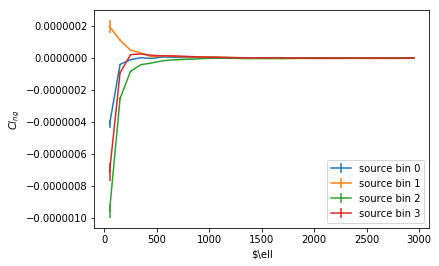

In [39]:
plt.figure()

for i in range(4):
    ell,cl, cov = A.get_ell_cl('galaxy_shearDensity_cl_e', 'source_'+str(i), 'lens_0', return_cov=True)
    plt.errorbar(ell,cl, np.diag(cov)**0.5, label='source bin '+str(i))
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.xlabel('$\\ell')
plt.ylabel('$Cl_{ng}$')

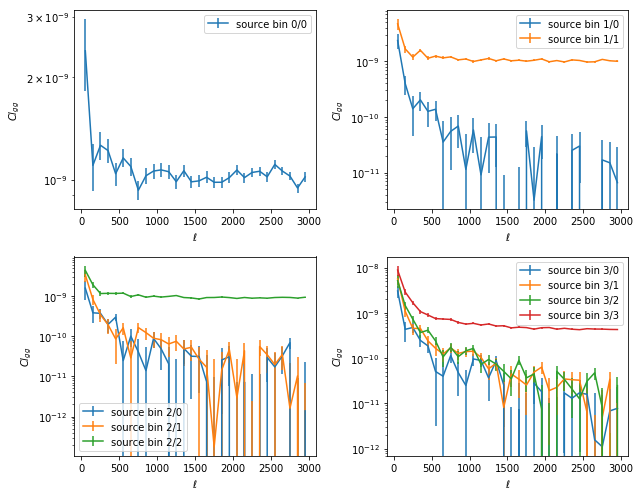

In [35]:
plt.figure(figsize=(9,7))

for i in range(4):
    for j in range(4):
        if i>=j:
            plt.subplot(2,2,i+1)

            ell,cl, cov = A.get_ell_cl('galaxy_shear_cl_ee', 'source_'+str(i), 'source_'+str(j), return_cov=True)
            plt.errorbar(ell,cl, np.diag(cov)**0.5, label='source bin '+str(i)+'/'+str(j))

#     plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('$\\ell$')
    plt.ylabel('$Cl_{gg}$')
    plt.tight_layout()

## Test invertability of covariance

In [36]:
cov_fourier = A.covariance.covmat
cov_real = C.covariance.covmat

In [37]:
#check that all eigenvalues are positive:
np.all(np.linalg.eigvals(cov_fourier) > 0)

#take a 'Cholesky' decomposition:
chol_A = np.linalg.cholesky(cov_fourier)

In [38]:
#check that all eigenvalues are positive:
np.all(np.linalg.eigvals(cov_real) > 0)

#take a 'Cholesky' decomposition:
chol_A = np.linalg.cholesky(cov_real[:300, :300])